In [1]:
import requests, random, time, re
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from dateutil import parser
from tqdm import tqdm
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns  = 200
import numpy as np

In [2]:
df = pd.read_csv("./data/b17_data/b17_data_cleaned.csv")
df['assignment_place'] = df['assignment_place'].fillna('').astype(str)
df.sample(2)

,serial_number,production_block,manufacturer,fate,fate_date,missions,assignment_place,assignment_date
5713,42-97878,B-17G-35-VE: 42-97836 to 42-97935,Lockheed/Vega,RFC Altus,15 November 1945,NaN,,NaN
2313,43-37521,B-17G-65-BO: 43-37509 to 43-37673,Boeing,Lost by enemy aircraft,18 March 1945,NaN,351BS/100BG [EP-K] Thorpe Abbotts,30/5/44


In [3]:
#df.dtypes

In [4]:
replacement_dict = {'interned': 'Interned', 'ditched': 'Ditched', 'Lost by flak/aa-fire': 'Lost by flak/AA-fire', 'caught fire in action':'Caught fire in action',
                   'under restoration': 'Under restoration','Rammed by E/A':'Lost by enemy aircraft', 'Mid-air collision with e/a':'Lost by enemy aircraft', 'Crashlanding':'Landing accident',
                   'Salvaged':'Scrapped', 'used in KG 200':'Used in KG 200'}

In [5]:
fate_list = ['Lost by flak/AA-fire', 'Lost by enemy aircraft', 'Failed to return', 'Salvaged', 'Lost by unknown reason', 'Returned to the USA', 'Ditched', 'Destroyed on ground', 
             'Battle damaged', 'Crashed on take off', 'Crashlanding', 'Landing accident', 'Mid-air collision', 'Mid-air collision with e/a', 'Lost by mechanical fault', 
             'Lost by friendly-fire', 'Scrapped', 'Out of gas', 'Struck Off Charge', 'in Aphrodite Project', 'Written off', 'RFC Bush Field', 'used in KG 200', 'Interned', 
             'Shot down by Swiss Air Force', 'Caught fire in action', 'Disappeared', 'RFC La Mesa', 'Rammed by E/A', 'Accident', 'Under restoration'] 

In [6]:
rfc_locations = ['RFC Albuquerque', 'RFC Kingman', 'RFC Altus', 'RFC Walnut Ridge', 'RFC Searcey Field', 'RFC Ontario', 'RFC Stillwater', 'RFC La Mesa', 'RFC Bush Field']
fate_replacement = {location: 'Returned to the USA' for location in rfc_locations}    # Create a dictionary where all values are 'Returned to the USA'

In [7]:
fate_list00 =  df['fate'].dropna().unique().tolist();              fate_word_list00 =  ", ".join(sorted(fate_list00))
df['fate'] = df['fate'].replace(replacement_dict)
df['fate'] = df['fate'].replace(fate_replacement)    # Replace the values in the 'fate' column based on the dictionary
df_filtered =  df[df['fate'].isin(fate_list)]
fate_list01 =  df_filtered['fate'].dropna().unique().tolist();     fate_word_list01 =  ", ".join(sorted(fate_list01))

In [8]:
print(f"\nNumber of unique fates in the dataset: ", len(fate_list00))
print('\n\033[32m', fate_list00, '\033[0m\n')
#         .         .         .         .         .         .         .         .         .         .         .
print(f"\nNumber of unique fates in the dataset: ", len(fate_list01))
print('\n\033[31m', fate_list01, '\033[0m\n')


Number of unique fates in the dataset:  38

 ['Lost by flak/aa-fire', 'Lost by enemy aircraft', 'Failed to return', 'Salvaged', 'Lost by unknown reason', 'Returned to the USA', 'ditched', 'Destroyed on ground', 'Battle damaged', 'Crashed on take off', 'Crashlanding', 'Landing accident', 'Mid-air collision', 'RFC Albuquerque', 'Mid-air collision with e/a', 'Lost by mechanical fault', 'Lost by friendly-fire', 'Scrapped', 'Out of gas', 'Struck Off Charge', 'RFC Walnut Ridge', 'RFC Stillwater', 'RFC Altus', 'RFC Ontario', 'in Aphrodite Project', 'Written off', 'RFC Kingman', 'RFC Searcey Field', 'RFC Bush Field', 'used in KG 200', 'interned', 'Shot down by Swiss Air Force', 'caught fire in action', 'Disappeared', 'RFC La Mesa', 'Rammed by E/A', 'Accident', 'under restoration'] 


Number of unique fates in the dataset:  24

 ['Lost by flak/AA-fire', 'Lost by enemy aircraft', 'Failed to return', 'Scrapped', 'Lost by unknown reason', 'Returned to the USA', 'Ditched', 'Destroyed on ground', '

In [9]:
places_list = df_filtered['assignment_place'].unique().tolist(); places_word_list =  ", ".join(sorted(places_list));  
print(f"\nNumber of unique places in the dataset: ", len(places_list))
serials_list = df_filtered['serial_number'].unique().tolist()
print(f"Number of serial numbers in the dataset: ", len(serials_list),'\n')
#print('\n\033[32m', places_word_list[:200], '\033[0m\n')


Number of unique places in the dataset:  1982
Number of serial numbers in the dataset:  6399 



In [10]:
places = ['Bassingbourn', 'Chelveston', 'Deenethorpe', 'Glatton', 'Molesworth', 'Podington', 'Polebrook', 'Rattlesden', 'Sth Plains', 'Sudbury', 'Thorpe Abbotts', 'Thurleigh', 
         "Gt Ashfield", "Earls Colne", "Debach" ] 

places = ["Bassingbourn", "Chelveston", "Debach", "Deenethorpe", "Earls Colne", "Glatton", "Gt Ashfield", "Molesworth", "Nutts Corner", "Polebrook", "Podington", "Rattlesden",
          "Sudbury", "Thorpe Abbotts", "Thurleigh"]

In [11]:
pattern = '|'.join(places)
df_filtered = df_filtered[df_filtered["assignment_place"].str.contains(pattern, na=False)]
df_filtered = df_filtered[df_filtered['fate_date'] != "None"]

In [12]:
places_list = df_filtered['assignment_place'].unique().tolist(); places_word_list =  ", ".join(sorted(places_list));  
print(f"\nNumber of unique places in the dataset: ", len(places_list))
serials_list = df_filtered['serial_number'].unique().tolist()
print(f"Number of serial numbers in the dataset: ", len(serials_list),'\n')
print('\n\033[32m', places_word_list, '\033[0m\n')


Number of unique places in the dataset:  871
Number of serial numbers in the dataset:  1718 


 (PFF) 457BG Glatton, (PFF) 834BS/486BG [2S-S] Sudbury, 100BG Thorpe Abbotts, 303BG Molesworth, 305BG Chelverston, then transferred 407BS/92BG [PY-J] Podington, 305BG Chelveston, 306BG Thurleigh, 322BS/91BG [LG- ] Bassingbourn, 322BS/91BG [LG-A] Bassingbourn, 322BS/91BG [LG-B] Bassingbourn, 322BS/91BG [LG-C] Bassingbourn, 322BS/91BG [LG-D] Bassingbourn, 322BS/91BG [LG-E] Bassingbourn, 322BS/91BG [LG-L] Bassingbourn, 322BS/91BG [LG-M] Bassingbourn, 322BS/91BG [LG-O] Bassingbourn, 322BS/91BG [LG-P] Bassingbourn, 322BS/91BG [LG-Q] Bassingbourn, 322BS/91BG [LG-R] Bassingbourn, 322BS/91BG [LG-S] Bassingbourn, 322BS/91BG [LG-T] Bassingbourn, 322BS/91BG [LG-V] Bassingbourn, 322BS/91BG [LG-W] Bassingbourn, 322nd Bomb Squadron/91st Bomb Group [LG-M] at Bassingbourn, 323BS/306BG [RD-X] Thurleigh, 323BS/91BG Bassingbourn, 323BS/91BG [0R-L] Bassingbourn, 323BS/91BG [LG- ] Bassingbourn, 323BS/91BG [OR-A]

In [13]:
df_filtered.sample()

,serial_number,production_block,manufacturer,fate,fate_date,missions,assignment_place,assignment_date
4948,42-38160,B-17G-30-DL: 42-38084 to 42-38213,Douglas,Interned,16 March 1944,NaN,550BS/385BG [SG-J] Gt Ashfield,6/2/44


In [14]:
def reformat_date(date_str):
    if pd.isna(date_str):
        return None
    try:
        dt = pd.to_datetime(date_str, format='%d %B %Y')
        return f"{dt.day}/{dt.month}/{dt.year % 100}"
    except Exception:
        return date_str  # if parsing fails, return original

# Apply to the specific column
df_filtered['fate_date'] = df_filtered['fate_date'].apply(reformat_date)

In [15]:
df_filtered.sample(5)

,serial_number,production_block,manufacturer,fate,fate_date,missions,assignment_place,assignment_date
5644,42-97777,B-17G-30-VE: 42-97736 to 42-97835,Lockheed/Vega,Lost by unknown reason,9/8/44,NaN,305BG Chelveston,27/7/44
5686,42-97834,B-17G-30-VE: 42-97736 to 42-97835,Lockheed/Vega,Lost by enemy aircraft,11/9/44,NaN,349BS/100BG [XR-J] Thorpe Abbotts,4/5/44
324,42-29491,B-17F-55-BO: 42-29467 to 42-29531,Boeing,Mid-air collision,7/5/43,NaN,509BS/351BG Polebrook,18/4/43
4385,42-31764,B-17G-30-BO 42-31732 to 42-31931,Boeing,Landing accident,10/11/44,NaN,549BS/385BG [XA-R] Gt Ashfield,22/4/44
2793,42-31672,B-17G-25-BO: 42-31632 to 42-31731,Boeing,Lost by enemy aircraft,20/3/44,6.00,401BS/91BG Bassingbourn,23/1/44


In [16]:
import pandas as pd

def parse_dates(date_str):    
    # Function to handle multiple date formats
    if isinstance(date_str, pd.Timestamp):
        return date_str  # Skip if it's already a Timestamp
    
    try:
        # First try: expected format dd MonthName yyyy (e.g., 06 April 1944)
        parsed_date = pd.to_datetime(date_str, format='%d %B %Y', errors='raise')
        return parsed_date
    except Exception:
        try:
            # Second try: expected format dd/mm/yy (e.g., 31/01/44)
            parsed_date = pd.to_datetime(date_str, format='%d/%m/%y', errors='raise')
            
            # Adjust the year if the parsed date is in the 2000s but should be in the 1900s
            if parsed_date.year >= 2000:
                parsed_date = parsed_date.replace(year=parsed_date.year - 100)
            return parsed_date
        except Exception:
            return pd.NaT

# Apply the date parsing to both start and end dates
df_filtered['start_date'] = df_filtered['assignment_date'].apply(parse_dates)
df_filtered['end_date']   = df_filtered['fate_date'].apply(parse_dates)

# Verify the changes by checking the first few rows
df_filtered.sample(5)

,serial_number,production_block,manufacturer,fate,fate_date,missions,assignment_place,assignment_date,start_date,end_date
1777,43-38159,B-17G-80-BO: 43-38074 to 43-38273,Boeing,Lost by flak/AA-fire,2/11/44,27.00,615BS/401BG [IY-N] Deenethorpe,11/8/44,1944-08-11,1944-11-02
3945,42-107092,B-17G-35-DL: 42-106984 to 42-107233,Douglas,Lost by flak/AA-fire,31/7/44,NaN,710BS/447BG Rattlesden,13/3/44,1944-03-13,1944-07-31
2227,42-97327,B-17G-45-BO: 42-97173 to 42-97435,Boeing,Destroyed on ground,30/6/44,NaN,368BS/306BG [BO-U] Thurleigh,1/4/44,1944-04-01,1944-06-30
5974,43-37736,B-17G-70-BO: 43-37674 to 43-37873,Boeing,Battle damaged,8/11/44,35.00,613BS/401BG [IN-T] Deenethorpe,10/6/44,1944-06-10,1944-11-08
2524,42-97239,B-17G-45-BO: 42-97173 to 42-97435,Boeing,Mid-air collision,8/5/44,NaN,369BS/306BG [WW-L] Thurleigh,2/4/44,1944-04-02,1944-05-08


In [17]:
# Handle missing end_date by filling with a date beyond the last known end date
plot_end_date = df_filtered['end_date'].max()  # Ensure it's a datetime object
if pd.isna(plot_end_date):
    plot_end_date = df_filtered['start_date'].max() + pd.Timedelta(days=10)  # Add 10 days if all are NaN

# Replace NaT values in 'end_date' with the computed plot_end_date
df_filtered['end_date'] = df_filtered['end_date'].fillna(plot_end_date)
df_filtered.sample(5)

,serial_number,production_block,manufacturer,fate,fate_date,missions,assignment_place,assignment_date,start_date,end_date
979,42-30146,B-17F-90-BO: 42-30132 to 42-30231,Boeing,Lost by flak/AA-fire,29/7/43,NaN,333BS/94BG [TS-A] Earls Colne,24/5/43,1943-05-24,1943-07-29
3229,43-39000,B-17G-100-BO: 43-38874 to 43-39073,Boeing,Returned to the USA,12/6/45,38.00,322BS/91BG [LG-E] Bassingbourn,11/12/44,1944-12-11,1945-06-12
7425,42-106986,B-17G-35-DL: 42-106984 to 42-107233,Douglas,Lost by flak/AA-fire,10/11/44,NaN,418BS/100BG [LD-B] Thorpe Abbotts,28/2/44,1944-02-28,1944-11-10
5995,43-37766,B-17G-70-BO: 43-37674 to 43-37873,Boeing,Lost by enemy aircraft,2/11/44,NaN,751BS/457BG [H] Glatton,17/6/44,1944-06-17,1944-11-02
2682,42-39929,B-17G-5-VE: 42-39858 to 42-39957,Lockheed/Vega,Landing accident,11/4/44,11.00,401BS/91BG [LL-K] Bassingbourn,20/12/43,1943-12-20,1944-04-11


In [18]:
# If you know the format, you can specify it here, like '%d/%m/%y'
#df_filtered['fate_date'] = pd.to_datetime(df_filtered['fate_date'], format='%d/%m/%y', errors='coerce')

# Handle missing end_date by filling with a date beyond the last known end date
plot_end_date = df_filtered['end_date'].max()                                 # Ensure it's a datetime object
if pd.isna(plot_end_date):
    plot_end_date = df_filtered['start_date'].max() + pd.Timedelta(days=10)   # Add 10 days if all are NaN
df_filtered['end_date'] = df_filtered['end_date'].fillna(plot_end_date)       # Replace NaT values in 'fate_date' with the computed plot_end_date
df_filtered = df_filtered.sort_values('start_date').reset_index(drop=True)    # Sort by 'start_date' and reset index
df_filtered.sample(5)

,serial_number,production_block,manufacturer,fate,fate_date,missions,assignment_place,assignment_date,start_date,end_date
1329,43-37873,B-17G-70-BO: 43-37674 to 43-37873,Boeing,Returned to the USA,7/7/45,NaN,709BS/447BG Rattlesden,4/8/44,1944-08-04,1945-07-07
275,42-31042,B-17G-1-BO: 42-31032 to 42-31131,Boeing,Lost by enemy aircraft,26/11/43,NaN,385BG Gt Ashfield,10/10/43,1943-10-10,1943-11-26
1418,43-38306,B-17G-85-BO: 43-38274 to 43-38473,Boeing,Crashed on take off,4/4/45,NaN,322BS/91BG [LG-B] Bassingbourn,18/8/44,1944-08-18,1945-04-04
743,42-31866,B-17G-30-BO 42-31732 to 42-31931,Boeing,Interned,13/4/44,NaN,550BS/385BG [SG-L] Gt Ashfield,15/2/44,1944-02-15,1944-04-13
230,42-30804,B-17F-120-BO: 42-30732 to 42-30831,Boeing,Lost by enemy aircraft,14/10/43,NaN,365BS/305BG [XK-G] Chelveston,18/9/43,1943-09-18,1943-10-14


In [19]:
for idx, row in df_filtered.iterrows():
    if row['start_date'] > row['end_date']:                 # Check if the start_date is after the end_date
        df_filtered.at[idx, 'start_date'], df.at[idx,       # Swap the values of start_date and end_date
        'end_date'] = row['end_date'], row['start_date']
        print(f"Swapped dates for serial_number: {row['serial_number']}")

Swapped dates for serial_number: 42-31538
Swapped dates for serial_number: 42-38168
Swapped dates for serial_number: 41-24619
Swapped dates for serial_number: 42-31441
Swapped dates for serial_number: 43-37976
Swapped dates for serial_number: 42-39820


In [20]:
fate_list =  df_filtered['fate'].dropna().unique().tolist(); fate_word_list =  ", ".join(sorted(fate_list))
print(f"\nNumber of unique fates in the dataset: ", len(fate_list))
print('\n\033[32m', fate_list, '\033[0m\n')


Number of unique fates in the dataset:  20

 ['Lost by flak/AA-fire', 'Scrapped', 'Failed to return', 'Lost by enemy aircraft', 'Battle damaged', 'Returned to the USA', 'Lost by unknown reason', 'in Aphrodite Project', 'Ditched', 'Landing accident', 'Mid-air collision', 'Lost by mechanical fault', 'Crashed on take off', 'Caught fire in action', 'Interned', 'Written off', 'Lost by friendly-fire', 'Out of gas', 'Destroyed on ground', 'Accident'] 



In [21]:
len(df_filtered)

1718

In [22]:
df_filtered.sample(3)

,serial_number,production_block,manufacturer,fate,fate_date,missions,assignment_place,assignment_date,start_date,end_date
213,42-30809,B-17F-120-BO: 42-30732 to 42-30831,Boeing,Lost by enemy aircraft,22/6/44,NaN,366BS/305BG [KY-G] Chelveston,6/9/43,1943-09-06,1944-06-22
788,42-38118,B-17G-30-DL: 42-38084 to 42-38213,Douglas,Lost by flak/AA-fire,6/3/44,NaN,323BS/91BG [OR-N] Bassingbourn,25/2/44,1944-02-25,1944-03-06
12,42-29540,B-17F-60-BO: 42-29532 to 42-29631,Boeing,Ditched,6/9/43,NaN,427BS/303BG [GN-S] Molesworth,25/2/43,1943-02-25,1943-09-06


In [23]:
df_filtered.loc[df_filtered['fate'] == 'Returned to the USA', 'end_date'] = '1945-12-31'
#df_filtered['end_date'] = pd.to_datetime(df_filtered['end_date'], format='%d/%m/%y', errors='coerce')  # Make sure fate_date is datetime

In [24]:
len(df_filtered)

1718

In [25]:
fate_colors = {'Lost by enemy aircraft': 'red',      'Lost by flak/AA-fire': 'blue',       'Crashed on take off': 'green',
               'Salvaged': 'gold',                   'Landing accident': 'purple',         'Ditched': 'orange',
               'Failed to return': 'pink',           'Crashlanding': 'brown',              'Mid-air collision': 'darkgray',
               'Written off': 'lightblue',           'Battle damaged': 'forestgreen',      'Lost by friendly-fire': 'black',
               'Lost by mechanical fault': 'navy',   'Interned': 'magenta',                'Destroyed on ground': 'darkred',
               'Returned to the USA': '#9c9c9c'}

In [26]:
losses_per_day = df_filtered.groupby(['end_date', 'fate']).size().unstack(fill_value=0)   # Group and filter
high_loss_days = losses_per_day[losses_per_day.sum(axis=1) > 10]
high_loss_days = high_loss_days[high_loss_days.index <= '1945-12-30'] 
high_loss_days.reset_index(inplace=True)  # Corrected line to reset index

In [27]:
high_loss_days.tail(3)

fate,end_date,Accident,Battle damaged,Caught fire in action,Crashed on take off,Destroyed on ground,Ditched,Failed to return,Interned,Landing accident,Lost by enemy aircraft,Lost by flak/AA-fire,Lost by friendly-fire,Lost by mechanical fault,Lost by unknown reason,Mid-air collision,Out of gas,Returned to the USA,Scrapped,Written off,in Aphrodite Project
20,1944-10-07,0,2,0,0,0,0,2,2,2,0,7,0,0,0,0,0,0,0,0,0
21,1944-11-02,0,1,0,0,0,1,0,0,1,12,8,0,0,0,0,0,0,0,0,0
22,1944-12-31,0,2,0,0,0,0,0,0,0,8,2,0,0,0,3,0,0,0,0,0


In [28]:
start_date  = df_filtered['start_date'].min()        # Start from the earliest date in the data
end_date    = df_filtered['end_date'].max()          # End at the latest date in the data

start_date  = pd.to_datetime('1943-03-01')
end_date    = pd.to_datetime('1945-05-30')

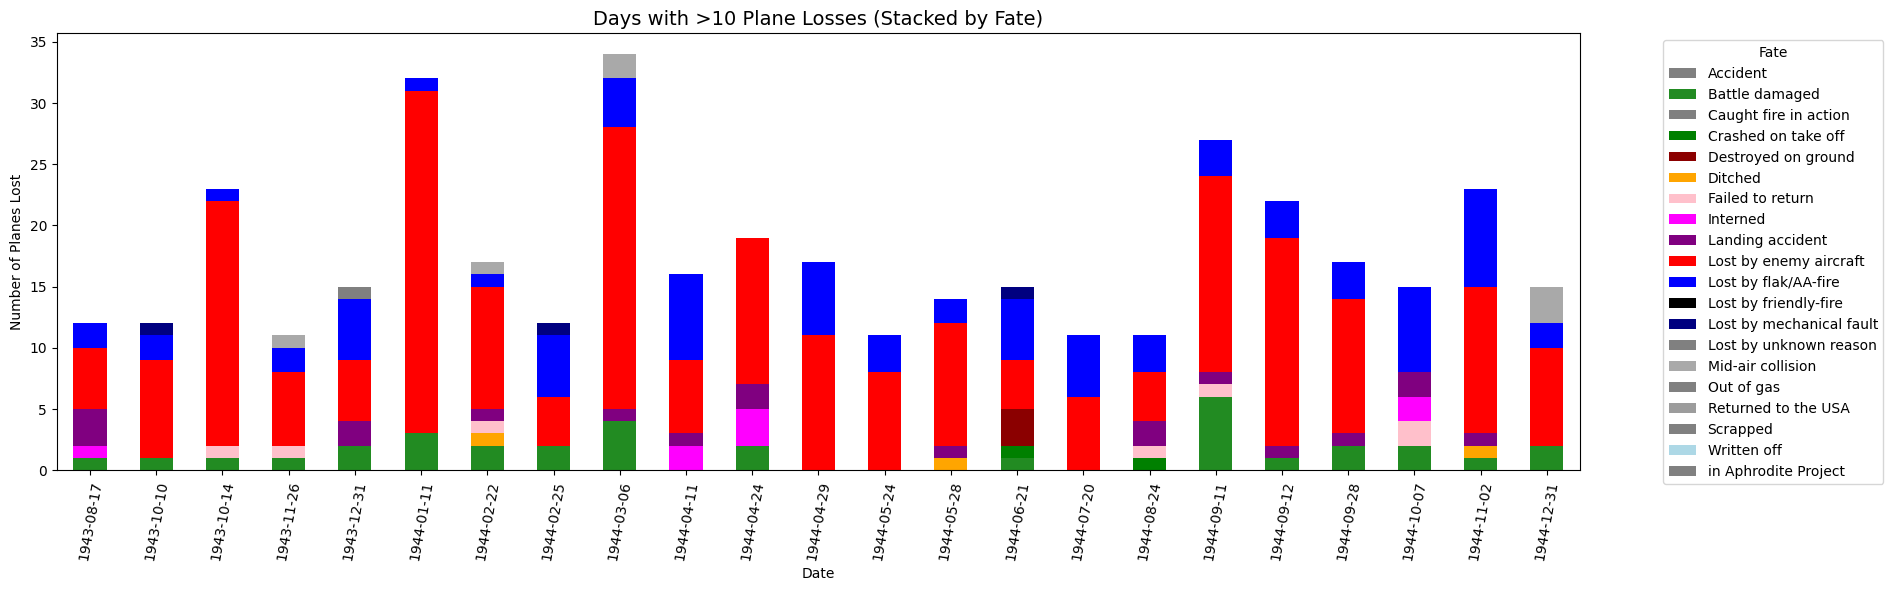

In [29]:
# Ensure the 'end_date' column is in datetime format
high_loss_days.loc[:, 'end_date'] = pd.to_datetime(high_loss_days['end_date'])

# Set the 'end_date' as index and remove the time part
high_loss_days.set_index('end_date', inplace=True)
high_loss_days.index = high_loss_days.index.date  # Extract only the date part

# Plot
ax = high_loss_days.plot(kind='bar', stacked=True, figsize=(16, 6),
                         color=[fate_colors.get(col, 'gray') for col in high_loss_days.columns])

plt.title('Days with >10 Plane Losses (Stacked by Fate)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Planes Lost')
plt.tight_layout()
plt.xticks(rotation=80)
plt.legend(title='Fate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [30]:
len(df_filtered)

1718

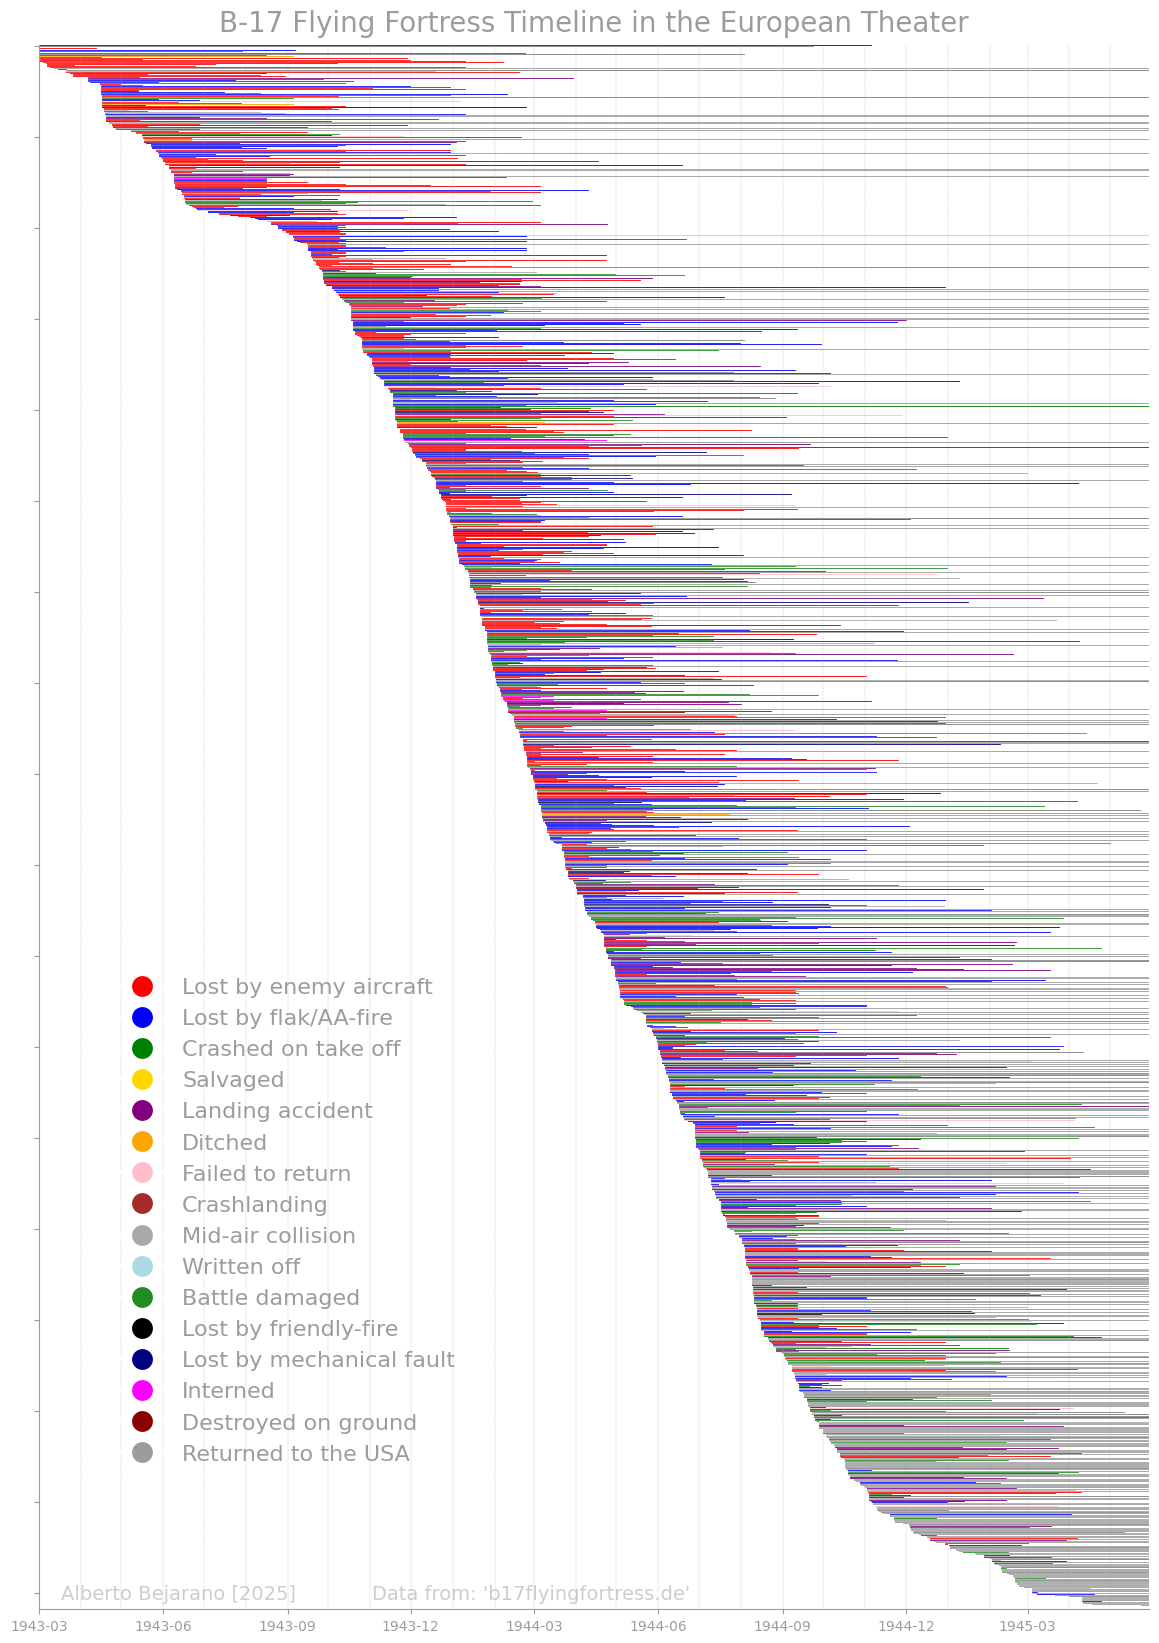

In [31]:
fig, ax = plt.subplots(figsize=(297/25.4, 420/25.4))
#         .         .         .         .         .         .         .         .         .         .         .
for idx, row in df_filtered.iterrows():
    color = fate_colors.get(row['fate'], 'gray')  # Default color if fate is not in the dictionary
    ax.barh(y=idx, width=(row['end_date']-row['start_date']).days, left=row['start_date'], color=color, height=1,
            edgecolor='#FFFFFF', linewidth=0.1)
#         .         .         .         .         .         .         .         .         .         .         .
ax.set_yticks(np.arange(len(df_filtered)))           # Use df_filtered length
ax.set_yticklabels(df_filtered['serial_number'])
#         .         .         .         .         .         .         .         .         .         .         .
ax.invert_yaxis()                                    # So earliest dates are at top
#ax.set_xlabel('Date'); ax.set_xlabel('Planes')
ax.set_title('B-17 Flying Fortress Timeline in the European Theater', color='#9c9c9c', fontsize=20, pad=10)
ax.set_yticklabels([])
#         .         .         .         .         .         .         .         .         .         .         .
ax.set_ylim(len(df_filtered)-0.35, -0.35)
ax.set_xlim(right = end_date)
ax.set_xlim([start_date, end_date])                  # Set x-axis limits to the range of the dates
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=3))  # Show every 3 months
#         .         .         .         .         .         .         .         .         .         .         .
#ax.set_xticks([]); ax.set_xlabel('')
#ax.set_yticks([]);
ax.set_yticks(range(0, len(df_filtered), 100))
ax.set_yticklabels([''] * len(range(0, len(df_filtered), 100)), color='#9c9c9c')  # empty labels
ax.tick_params(axis='both', colors='#9c9c9c', which='both') 
ax.set_ylabel('')
ax.spines['top'].set_visible(False);    ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#9c9c9c'); ax.spines['bottom'].set_color('#9c9c9c')
#         .         .         .         .         .         .         .         .         .         .         .
start_date = df_filtered['start_date'].min()  ;  start_date = pd.to_datetime('1943-03-01')  # Start from the earliest date in the data
end_date   = df_filtered['end_date'].max()    ;  end_date   = pd.to_datetime('1945-05-30')  # End at the latest date in the data

month_starts = pd.date_range(start=start_date.replace(day=1), end=end_date, freq='MS')
for month in month_starts:
    ax.axvline(month, color='#9c9c9c', linestyle='--', linewidth=0.2)
#         .         .         .         .         .         .         .         .         .         .         .
handles = [plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=16, markerfacecolor=color) 
           for key, color in fate_colors.items()]
leg = ax.legend(handles=handles, loc='lower left', bbox_to_anchor=(0.055, 0.08), title='', fontsize=16, frameon=False,
               facecolor='#FFFFFF',framealpha=0.8)
plt.setp(leg.get_texts(), color='#9c9c9c')                    # Legend labels
if leg.get_title():                                           # Legend title (if any)
    leg.get_title().set_color('#9c9c9c')
#         .         .         .         .         .         .         .         .         .         .         .
text_kws = dict(color='#9c9c9c', ha='left', va='center', fontsize=14, alpha=0.5, transform=ax.transAxes)
plt.text(0.30, 0.01, "Data from: 'b17flyingfortress.de'",  **text_kws)
plt.text(0.02, 0.01, "Alberto Bejarano [2025]",            **text_kws)

#ax_legend.set_title('Fate Legend')
#ax.legend.axis('off')
#         .         .         .         .         .         .         .         .         .         .         .
plt.tight_layout();
fig.savefig('Timeline_B17_planes.jpg', format='jpg', dpi=1200)
plt.show()

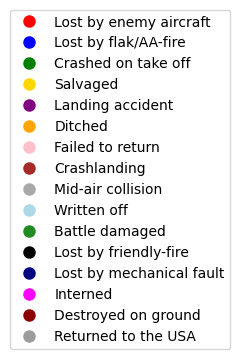

In [32]:
fig_legend, ax_legend = plt.subplots(figsize=(2, 3))
handles = [plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=color) 
           for key, color in fate_colors.items()]
ax_legend.legend(handles=handles, loc='center', fontsize=10)
#ax_legend.set_title('Fate Legend')
ax_legend.axis('off')
plt.tight_layout()
plt.show()